In [1]:
from PIL import Image
from io import BytesIO
import base64
import numpy as np
from flask import Flask, jsonify, render_template, request
from tensorflow.keras.preprocessing.image import img_to_array
import re
import io
import sys
import os
import tensorflow as tf

# sys.path.append(os.path.abspath("./model"))
# from tensorflow.keras.models import model_from_json
# 
# def init():
#   json_file = open('./model/model.json','r')
#   loaded_model_json = json_file.read()
#   json_file.close()
#   loaded_model = model_from_json(loaded_model_json)
#   #load weights into new model
#   loaded_model.load_weights("./model/model.h5")
#   print("Loaded Model from disk")
#   #compile and evaluate loaded model
#   loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#   graph = tf.get_default_graph()
#   return loaded_model,graph

# model, graph = init()

/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

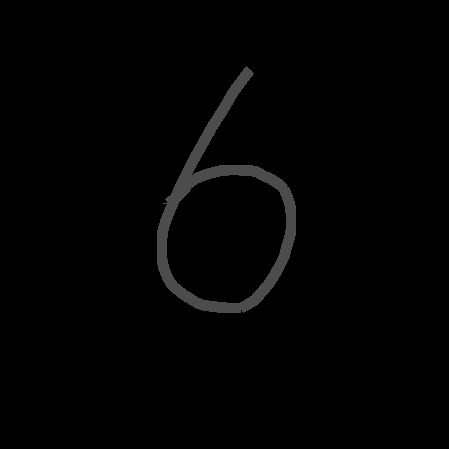

In [2]:
image_data = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcEAAAHBCAYAAAARuwDoAAAgAElEQVR4Xu3dCdx913zv8c+iqGpUkBap8SKiVEIrxoh5aM1KJdpKuDFeQ2kMFxW0xMxV83gl0bqmmofQiLmDoEqiahZziTTGl677WvZ+2pPHGdY+zxn23r/Pfr2e1z/+z9p7r997rfhmn7P3Xgk3BRRQQAEFggqkoHVbtgIKKKCAAhiCTgIFFFBAgbAChmDYobdwBRRQQAFD0DmggAIKKBBWwBAMO/QWroACCihgCDoHFFBAAQXCChiCYYfewhVQQAEFDEHngAIKKKBAWAFDMOzQW7gCCiiggCHoHFBAAQUUCCtgCIYdegtXQAEFFDAEnQMKKKCAAmEFDMGwQ2/hCiiggAKGoHNAAQUUUCCsgCEYdugtXAEFFFDAEHQOKKCAAgqEFTAEww69hSuggAIKGILOAQUUUECBsAKGYNiht3AFFFBAAUPQOaCAAgooEFbAEAw79BaugAIKKGAIOgcUUEABBcIKGIJhh97CFVBAAQUMQeeAAgoooEBYAUMw7NBbuAIKKKCAIegcUEABBRQIK2AIhh16C1dAAQUUMASdAwoooIACYQUMwbBDb+EKKKCAAoagc0ABBRRQIKyAIRh26C1cAQUUUMAQdA4ooIACCoQVMATDDr2FK6CAAgoYgs4BBRRQQIGwAoZg2KG3cAUUUEABQ9A5oIACCigQVsAQDDv0Fq6AAgooYAg6BxRQQAEFwgoYgmGH3sIVUEABBQxB54ACCiigQFgBQzDs0Fu4AgoooIAh6BxQQAEFFAgrYAiGHXoLV0ABBRQwBJ0DCiiggAJhBQzBsENv4QoooIAChqBzQAEFFFAgrIAhGHboLVwBBRRQwBB0DiiggAIKhBUwBMMOvYUroIACChiCzgEFFFBAgbAChmDYobdwBRRQQAFD0DmggAIKKBBWwBAMO/QWroACCihgCDoHFFBAAQXCChiCYYfewhVQQAEFDEHngAIKKKBAWAFDMOzQW7gCCiiggCHoHFBAAQUUCCtgCIYdegtXQAEFFDAEnQMKKKCAAmEFDMGwQ2/hCiiggAKGoHNAAQUUUCCsgCEYdugtXAEFFFDAEHQOKKCAAgqEFTAEww69hSuggAIKGILOAQVGKJDhsQkeO8LSLEmBlQoYgivl9GAKbF+gBCDw58CxBuH2x8Me9FvAEOz3+Ng7BToJZDgKuFS7k0HYSc/GEQUMwYijbs2jFMhwAHAqcH7gJOA04P5eEY5yuC1qRQKG4IogPYwC2xbI8C7gJhP9+CHN391m5+8S+O/8tgfK8/dKwH8hejUcdkaB5QQmvgecdoBydXhw+YUhuJyve41XwBAc79haWRCB3Fz9lSu+edt3gIv40WiQSWGZ1QKGYDWVDRXon0Buvv/7GHDFDr3zrtEOWDYdt4AhOO7xtbqRC2R4Cc0dobXbqQmuXtvYdgqMXcAQHPsIW99oBTLcG7gfcJXKIj8DHJSg3DDjpoACzffkbgooMDSBDNcBPtD2+4vtv8s7zwfOKuemqXl0wk0BBVoBQ9CpoMDABDJcAPh74Mq7uv5BmnCctvk94MDG2e5uRsAQ3IyzZ1FgZQIZTgTuOuOAJwOHtA/M7zQ5KcFNV9YBD6TAiAQMwRENpqWMXyDDw4EnLqi0PBf4I+DaNN//HZzg9PHrWKEC3QUMwe5m7qHAVgQy3BJ4a+XJzwbeXtoneGnlPjZTIJyAIRhuyC14iAIZ9m+/B7xEh/4/P8F9OrS3qQLhBAzBcENuwUMUyM0VYLkSrN0+lGbfJFN7DNspMHoBQ3D0Q2yBQxfIzXeA5bvA2q18FHrNBJ+q3cF2CkQVMASjjrx1D0IgN3eBlrtBu2yHJ3hVlx1sq0BUAUMw6shbd+8FcvMcYHkesDwXWLs9KcEjahvbToHoAoZg9Blg/b0VyFAefi+POdRub0twq9rGtlNAAV+b5hxQoJcCGZ5H827Q2u2M9nvAr9buYDsFFDAEnQMK9E4gw+HABYGndvgo9FYJ3ta7YuyQAj0X8OPQng+Q3YsnkJu3u5TnAZ/fvgt01vtAd3AekeBJ8aSsWIG9CxiCezf0CAqsTCDDo4HHTRzwE8DXgJvPOMmrUnPl6KaAAksIGIJLoLmLAusQyHAZ4LPAuaccv6wef9Cuvy/PAZbnActzgW4KKLCEgCG4BJq7KLAOgQwvB/5kwbG/A1ykbXPd1NxB6qaAAksKGIJLwrmbAqsUyHBj6he8LStElI9Bj1plHzyWAhEFDMGIo27NvRPIcApw/cqOvT11e49o5WFtpkA8AUMw3phbcc8EMhwNvKBDt66V4CMd2ttUAQVmCBiCTg0FtiiQ4fztzTC1SyT9VYL7b7HLnlqBUQkYgqMaTosZmkCG44BjKvv9feDyCb5V2d5mCiiwQMAQdIoosCWBDFcB/rnD6f80wTM6tLepAgoYgs4BBfopkOH/AXeq7N2pCa5e2dZmCihQKeCVYCWUzRRYpUCG2wJv6HDM2yZ4Y4f2NlVAgQoBQ7ACySYKrFogw0eBgyuP+5oEf1DZ1mYKKNBBwBDsgGVTBVYhkOHBwNM7HOuqCT7Zob1NFVCgUsAQrISymQKrEMiwX/tIRFkqqWY7LsHDaxraRgEFugsYgt3N3EOBpQUyPAe4X+UBykK55ZGIH1a2t5kCCnQUMAQ7gtlcgWUFMlwL+FCH/Y9O8KIO7W2qgAIdBQzBjmA2V2BZgdys/H6Lyv3fl+DQyrY2U0CBJQUMwSXh3E2BLgIZngvcFbhQ5X43SfDuyrY2U0CBJQUMwSXh3E2BWoEM+wJlAdyLAR8HrrZg35cnOLL2+LZTQIHlBQzB5e3cU4EqgQwvBu4x0fibwBeB351ygJ+1N8N8oergNlJAgT0JGIJ74nNnBeYLZLgd8PoZrd4HXBQ4cOL3j0nweF0VUGAzAobgZpw9S0CBDOdpPwa9/Jzyy8oQ7wJuDpyR4ICAVJaswNYEDMGt0XvisQvkZsWHB1XW+c4ShgmeWtneZgoosAIBQ3AFiB5Cgd0CGW7SXuHV4vxNgj+sbWw7BRRYjYAhuBpHj6LAOQQ6viD7bODKCb4kowIKbFbAENyst2cLIJCbG1se1aHU+yZ4Xof2NlVAgRUJGIIrgvQwChSBDIcAH+6g8dYEv9ehvU0VUGCFAobgCjE9lAIZTgGu30Hit1LzIL2bAgpsQcAQ3AK6pxynQIZjgOM6VPewBE/u0N6mCiiwYgFDcMWgHi6mQIYrA//SoXpfkN0By6YKrEvAEFyXrMcNJZDhLcCtOhR9rQQf6dDepgoosAYBQ3ANqB4ylkCG+9CsElG7PSHBo2sb204BBdYnYAiuz9YjBxDIcKn21WgXqCz31ARXr2xrMwUUWLOAIbhmYA8/boEMfw3cpUOVN01wUof2NlVAgTUKGIJrxPXQ4xbI8FDgBsDvV1b6zAQPrmxrMwUU2ICAIbgBZE8xToHcPN+3D/Be4NbABedU+tn21Wg/HaeGVSkwTAFDcJjjZq+3LJDhIZxzxYeyYvyZwKEzunb7BG/Ycrc9vQIK7BIwBJ0SCnQUyHAh4HPAvlN2/ShwSWC/id+9JME9O57G5goosAEBQ3ADyJ5iXAIZnkLzfeC87dPtivFfbz8G/e64FKxGgXEIGILjGEer2JBAhgPbRyJqzvifwAsS3LemsW0UUGDzAobg5s0944AFMhwPHFFZwnsS3Liyrc0UUGALAobgFtA95TAFMtwQeE+H3t8owd91aG9TBRTYsIAhuGFwTzdcgQzvBm5UWcEJCe5W2dZmCiiwJQFDcEvwnnZYAhkOB07o0OsDE5zWob1NFVBgCwKG4BbQPeXwBNoH48tNMTXbUxP8WU1D2yigwHYFDMHt+nv2AQhMeTB+Xq/LoxCXS/C9AZRmFxUIL2AIhp8CAswTWPBg/LRdH5rgaaoqoMAwBAzBYYyTvdySQOWD8Tu9+3RqVph3U0CBgQgYggMZKLu5eYEMVwLKm19qtyMSnFjb2HYKKLB9AUNw+2NgD3oq4IPxPR0Yu6XACgUMwRVieqjxCPhg/HjG0koUmCdgCDo/FJgi4IPxTgsFYggYgjHG2So7CGR4DnBv4NyVu105dfvusPKwNlNAgXULGILrFvb4gxPITaBdBDgduN6CAp6WFi+rNDgDO6xAFAFDMMpIW2eVQIZjgOMmGpdAPAu45pQD+GB8laqNFOivgCHY37GxZxsWyHBR4PPAr0459UeAfcoCuRO/88H4DY+Rp1Ng1QKG4KpFPd5gBTI8C3jAggJOBg4AvueD8YMdajuuwH8JGIJOBgWADAcBp1Zi/BB4aYL7V7a3mQIK9FTAEOzpwNitzQpkeC1wh8qznpTgppVtbaaAAj0WMAR7PDh2bTMCGX4feFOHs90gwSkd2ttUAQV6KmAI9nRg7NbmBDKUm16m3f05rRMvT3Dk5nrnmRRQYJ0ChuA6dT127wVy81D88zp09H8k+FyH9jZVQIEeCxiCPR4cu7ZegQznowm0S1Se6QkJHl3Z1mYKKDAAAUNwAINkF9cjkOEJwP+uPPpX2xXjf1LZ3mYKKDAAAUNwAINkF1cvkOFywL91OPK9E7ygQ3ubKqDAAAQMwQEMkl1cvUCGlwF3rzzy3yc4pLKtzRRQYEAChuCABsuurkYgw6HAezsc7dYJ3tyhvU0VUGAgAobgQAbKbq5OIMO7gJtUHvF1Ce5Y2dZmCigwMAFDcGADZnf3JpDhSe37Qc9feaSDE3yssq3NFFBgYAKG4MAGzO7uTSDDPwHfb5dHuvWCoz07wQP3dkb3VkCBPgsYgn0eHfu2UoEMRwDHTxz0w827s7n2lBP9B3DZBN9eaSc8mAIK9ErAEOzVcNiZdQq0V4FXn3KOsnpEWUPwChO/OybBU9bZH4+tgALbFzAEtz8G9mADAlOuAqedtawifzHgGwkO3EC3PIUCCmxZwBDc8gB4+s0IZPgocHDl2Z6b4H6VbW2mgAIDFjAEBzx4dr1OoPIqcOdgH01wjboj20oBBYYuYAgOfQTt/0KBOd8FTtv3bglOWHjQJRpkuEj7su6Lz/mzLO77kMrDvw64DvDvwHfaP8s/T/7s/vvvJCg3/bgpoABgCDoNRi2wzavADNcHbgzcCHgD8LQK7BOBwyvalSYnA4dVtp1sVh7+L0FbFgb++U+Cs5c4jrsoMHgBQ3DwQ2gB8wQ2eRWY4Yrtm2hK8JWfX5vo2z2BF1eMVpdg+wTw2xXH3N2kPCqy+2r38sAhCUoIuykQRsAQDDPU8Qpd91Vghgu1YbcTeiUEZ21/DhxbMQqnAwdUtCtNvgL8ZmXbyWaPAR438RdlNY3fbVfV+IfSzwQfXOK47qLA4AQMwcENmR2uFVjHVWCGSwO3B64KHFXbF5orrJqPOc8C9qk87g+AX6lsO9nsb4C7TPxFWVHjTOBBE3/3whKUCco6im4KjFbAEBzt0MYubJVXgRPBV8KvrEBRto8Dl9n1kec89M8C5SPHPmyfKwsET3TksUD52b39uA3Cv+xDp+2DAusQMATXoeoxty6wiqvADEe2V3wPnlHQSR1WoyiHKDefXGDLOD8CfnlXH8qqGjed068SmicluNeW++7pFVi5gCG4clIPuG2BvVwFZrgUUG5iKT/lUYbnA/eeUdNbgN/rUO83gN/o0H4dTb8L7Dtx4K+3b8mZd64fAmXVja+1N/e8OMGX1tE5j6nApgUMwU2Le761CyxzFZjhBm3w3W1XB8t3YuUl2leb0vHTgCt1KOhbwH4d2q+jaXmG8MITBy7PEZbnF+dt5fvCyTtdS9tyd+mLUrfFiddRj8dUYE8ChuCe+Ny5bwLLXAVm+ED70Pmscsozfreb8csv0twsU7P9FDhPTcM1ttm5qqs9xaL6yl2kt0tQAt5NgcEJGIKDGzI7PE+g41Xge4Byp2T52HPajSE7pyqrTMx67+g/Ar/TYVTKx4+fB85oP178hT9T8/aXhVtuVr4oV3Hlym7yZ9bflavQrlei5aXi814mXtzKDT/nKg/gJyj1uSkwGAFDcDBDZUcXCXS8Cpx8vOBWwFsXHH/W3Z1faO8SnbX7Z4B37/wk+N6iOtb5+9zcmFPucC3fc5abYcp3fbO299G89Wbe9gDg2W2DEt4lCF+xzho8tgKrFDAEV6npsbYq0PEqcLKvZbX5fwH+eE4B5ZGIad8L7t6lfH9WQq/cOfruBCUEe7tleCRQHp4/35ROvhn4/TmdfzVwwylXl+WZSK8KezvqdmxSwBB0PoxCoONV4LSa3wjcZkmMcqdkeeC8hF65ehrUlmH/NgiPnuh4ecVbuUN23vZO4GYzGnhVOKhZELezhmDcsR9V5R2vAsv3cJeYArDogfbJxwnKi6dfX34SlJtHBr/lZkWK8nq38gq18saYh80pqvb1bl4VDn5mjLsAQ3Dc4xuiugz3AZ7bodhFN3vMOtSXgaePKfimFZqb17uVRYVLKM7aurzezavCDpPTppsVMAQ36+3Z1iCQ4cPAN9s7JK9beYpZN31Me4wh5DNxc56dXOadpX9U7iJN8+/CrRw6mymwOgFDcHWWHmkLAhluuevOzvIxZXmpdM1jC/PufvTtKO14TnmLTteRPr5doaJ81Pq0BA/tegDbK7AuAUNwXbIedyMCGd404w7GnwDnrejEtI9GX5Hg7hX7hmuSmzUR77Dr1WvzHMpD9OWRicngMwjDzZz+FmwI9nds7NkCgdxc7ZX17xZtJRC/D1x0SsPJECyPStwrQfnTbYZAhouVK7rKpaHKzUNl9Y3dm0HoDOuFgCHYi2GwE8sIZHgpzUoPtdvuJYR29isfi37aVRJqGZt2Gf6kDcNZ7x5dtPJ9Wbx33pt6unXI1gosIWAILoHmLtsXaNf4K29rWcVWrv7KIwFuHQXmXBUuWjbKAOxobfP1CBiC63H1qGsWyPCkBc+x1fSgXBne2Y8/a6jmt6m4Kpw8wLFlBYr2YfybJai9o3fvHfUICuwSMASdEoMTyM3dn+XB9X320PkvpmZleLcVCbRXheUtMledc8jyEfYv7XpF3WEuybSiQfAwnQUMwc5k7rBtgQwPAZ66x34clKC8D9RtxQK5eXFBeYHB7q28Xq4sWrx7Oz5BeY7QTYGNCxiCGyf3hHsVyPBvwOUqj1NeAl2W+plc/PaJqXlxtNuaBHLzHynlP1Zqt0u7Wn0tle1WKWAIrlLTY61dIDcrPXRdqqd8B5XbNQPLWn5XSPCztXc2+AkyvB24eSXD41OzmoWbAhsVMAQ3yu3J9irQrgJf1uS7docHtstpSxD+NXCNBOU1aG4bEMhQ3jFaFv9dtH0tTX+p+aL9/L0CexIwBPfE586bFGjfZXnyHs7pbfl7wFtm1wyPAx5due9RqVmSyk2BjQkYghuj9kR7FcjN6u/lXaHLbL6hZBm1Pe7Tvnd00VJTX6V5/d0PE/zpHk/p7gp0EjAEO3HZeFsCGR4PPKry/P+x6yM4A7ASbh3NMpQXaB8x5din0qzFeFngau3vLzOW9RnXYekxVy9gCK7e1COuUGDijSS3aJdKqj16+dj0MFctqOVaX7spH2OXR1Mu0N61u/vED07wzPX1xiMrcE4BQ9AZ0VuB9k7QsojtrHdTLur7yQluuKiRv1+/QIbyjOB5aF6+PW87JcEN1t8jz6BAI2AIOhN6KZCbFyt/Fnjlkh30I9Al4daxW4YHAc+oPLYfiVZC2WzvAobg3g09wooF2gAsC7CWxxrKn103A7Cr2Jrbd3zhuR+Jrnk8PPx/CxiCzoZeCkwEYZf+/StwosvzdCHbXNsM7wUOrTijH4lWINlkNQKG4GocPcoaBJYIQq8A1zAOqzqkH4muStLjrFLAEFylpsdaqUDlM2Y75/xE+u/b7FfaDw+2GgE/El2No0dZrYAhuFpPj7YHgdy833PZzbeNLCu3wf0qPxItj1C8PjXfCbspsFYBQ3CtvB58LwIZzgAuXnEM3ztZgdSHJnM+Ev0k8AHgtLaf5Q7RckepmwJrFTAE18rrwZcVyHAkUBZgrdlcgaBGqQdtdn0kemZ5VRrNIskXnNK9/VPzH0JuCqxNwBBcG60H3otAhn8AymoRN6k4jmvRVSD1pUmGb1e+AOG6CT7Yl37bj3EKGILjHNdBV5XhusD7J4o4BbgQ8NtTCnNV8oGNdoZ3ADer6PYRCU6saGcTBZYWMASXpnPHdQlkeAlw1JTj/zPN+nTXmfjdYal5/sxtIAIZXgAcXdHdRyZ4YkU7myiwtIAhuDSdO65DIDfvCS0fl83bvgt8qnyXlODq6+iHx1yfQIZHAn9RcYYXJrhXRTubKLC0gCG4NJ07rkMgwzHAcZXHvkeqv3mm8pA2W7dAhsOBEyrO884EN69oZxMFlhYwBJemc8d1COTmFvkDKo797QT7VbSzSc8EcvNxdnkcYtF2eoIrLWrk7xXYi4AhuBc9912pQIbbAH9bedAnJ3hYZVub9Uggw/7AV6Z0qXzMXRbZ/cLOT4Jn9ajrdmWEAobgCAd1qCXlJgBLENZsV0pwek1D2/RPoPbtQMnl3vo3eCPrkSE4sgEdajm5+Qh0520hi8r42wS3W9TI3/dXwBDs79hE65khGG3Ee1pvbm6GKTfF1Gy3TfDGmoa26aeAIdjPcYnYK0Mw4qj3sOYM3wIuWtE1b5aoQOp7E0Ow7yMUp3+GYJyx7m2luXkwvjwgX7Mdk+ApNQ1t018BQ7C/YxOtZ4ZgtBHvYb0ZHgpciub5sfKw/Lztogm+08My7FIHAUOwA5ZN1ypgCK6V14MvEsjwG8DX23bvpgm4KwAHT9n3pQnuseiY/r7/AoZg/8coSg8NwSgj3dM6M9wdeNmU7n0eOBu4ysTvrpfqHrLuabV2a0fAEHQu9EXAEOzLSATtR4a/Ae68oPwflEBM8OtBmUZXtiE4uiEdbEGG4GCHbhwdz/B9YJ+Kah6R4EkV7WwyAAFDcACDFKSLhmCQge5jmbl5OfLbK/t2UIKPV7a1Wc8FDMGeD1Cg7hmCgQa7b6VmeCbwwIp+/WuCK1a0s8lABAzBgQxUgG4aggEGua8lZvhMeyfooi4+O9WF5aLj+PueCBiCPRkIu4Eh6CTYikCGqwEfqzz5LRK8o7KtzQYgYAgOYJCCdNEQDDLQfSszw8OBJ1b066wEF6xoZ5MBCRiCAxqskXfVEBz5APe1vAzHA7cELrygj69OcJe+1mG/lhMwBJdzc6/VCxiCqzf1iBUC7U0xZfHU8njE5YFDZqwof2SCl1cc0iYDEjAEBzRYI++qITjyAe5jeXNWFi/PDJ4FnBfYr+37xRJ8o4912KflBDJcCfj0lL3LOH+q/Sm//1SCv1vuLO6lQJ2AIVjnZKsVCmS4DnWvP/tagkus8NQeqgcCGe4AvLaiKx9PcFBFO5sosLSAIbg0nTsuK5Cb1SJOqNj/nal5oN5tRAIZHgU8vqKkV6VmrrgpsDYBQ3BttB54lkCGRwJ/USH0wgT3qmhnkwEJZDgRuGtFlx+d4AkV7WyiwNIChuDSdO64rECGFwBHV+z/yFT3GEXFoWzSF4EM5YaoS1f0544JXlfRziYKLC1gCC5N547LCuTmwfebVex/RGquGtxGIrBr/civAD8C9p2xmPKBCU4bSemW0VMBQ7CnAzPmbuXm/9gOqKjxugk+WNHOJgMRmLN+ZHmF3qk0dwL/ElAC8EYDKctuDljAEBzw4A2167l5D+hl2p/ysVj553I1sHvbP8EZQ63Tfv+iQOX6kf8OvC3B3TRUYN0ChuC6hT3+Lwj4oHTcSeH6kXHHvq+VG4J9HZkR98sQHPHgzinN9SNjjnvfqzYE+z5CI+yfITjCQa0oKcOzgAdUNHX9yAokm6xGwBBcjaNH6SBgCHbAGlHTDutHPivBg0ZUuqX0WMAQ7PHgjLVrhuBYR3Z2Xa4fGW/Mh1KxITiUkRpRPw3BEQ1mZSmuH1kJZbONCxiCGyf3hIZgvDnQviDhd1w/Mt7Y971iQ7DvIzTC/hmCIxzUOSVluBDwXeBM4BPAj9tnQ8s6krs314+MNT22Xq0huPUhiNcBQzDWmGe4I/CaKVWXd4iWlyGUhZWv2v7e9SNjTY+tV2sIbn0I4nXAEIw15hmeC9ynourTU7PgrpsCGxMwBDdG7Yl2BAzBWHMhw+nAFSuqPjbBYyva2USBlQkYgiuj9EC1AoZgrdTw2+Um/EoI1myHJnhfTUPbKLAqAUNwVZIep1rAEKymGnzDDPcF/qqikDNTcwONmwIbFTAEN8rtyYqAIRhnHmR4LXCHiopfl5obaNwU2KiAIbhRbk9mCMaaAxm+B/xaRdX3TfC8inY2UWClAobgSjk9WI2AV4I1SsNvk+H6wCmVlRyQoCys66bARgUMwY1yezKvBOPMgQyvpG5h3M8kOCCOjJX2ScAQ7NNoBOmLV4IxBjrDWcCvVlT7vNTcQOOmwMYFDMGNk3tCQ3D8cyDDEcDxE5V+GTgXsP+U6u+Umhto3BTYuIAhuHFyT2gIjn8OZPgn4OpTKn0/8DHg4sBN2ptm9k3NDTRuCmxcwBDcOLknNATHPQemXAVOK/gdwDOAsxOUYHRTYCsChuBW2GOftDYEgfMl+ElsreFVP+cqcFoxd0twwvCqtMdjETAExzKSA6ojN98NXQs4ZOLPS08pwddoDWhcS1crrwJ3qvpogmsMrES7OzIBQ3BkAzqEcjJ8qA2/Rd39swRPXdTI3/dHwKvA/oyFPakTMATrnGy1QoEMzwQeWHHI1yT4g4p2NumBgFeBPRgEu9BZwBDsTOYOexXIcFfgxIrjfCXBJSva2aQHAl4F9mAQ7EJnAUOwM5k77FUgw2WBz1Ue53IJPl/Z1mZbEsjNShG1D7z7XeCWxsnT/qKAIeis2IpAhvLw9G9WnPzwBK+qaGeTLQpk+BSwH/BN4MoLuuIdoVscK099TgFD0BmxFYEMr6Fu6ZxnJXjQVjrpSasEMjyEc97AVF6EfTZw8JQDeBVYpTbmCUoAABAoSURBVGqjTQkYgpuS9jznEMjwZ8CTK1jOSnDBinY22YJAbhbCLR9t7zvl9B9u/648DrOzeRW4hXHylLMFDEFnx1YE5iyz83XgR8BlJjp2WIL3bqWjnnSuQG6uAMuV4LztLe2LtPfxuUAnVN8EDMG+jUiQ/mQ4L/AD4CNAuWI4H3BN4HenEJyQ6pbkCaLXjzIzXAn4dGVvflY+Mk3w8Mr2NlNgIwKG4EaYPck0gQyXAo4C7jljdYHJ3S6d4EtK9kcgN6tElNUiarb3JLhxTUPbKLBJAUNwk9qe6xwCGY4EXlrJ8vgEj6lsa7M1C2S4IfCeDqe5UYK/69DepgpsRMAQ3AizJ5klkOGMdlmdRUhfS3CJRY38/WYEMrwbuFHl2fw4uxLKZpsXMAQ3b+4ZJwQyPA54dCXKUQleVtnWZmsSyPA84Oh2kdyasxyY4LSahrZRYNMChuCmxT3fOQTa7wW/uIClXC2eWh7GTs3KE25bEshwMeCTwEWAfwWusKAr5WaY8jiMmwK9FDAEezkssTqV4ZVMv/vz48B3gGsD529VrpngH2IJ9afa3Kz9d/hEj75L81q7aavIl9+V1965anx/htCe7BIwBJ0SWxfIcAPg5ImOlEcm9gF+a0rn/irB/bfe6YAdyPDHwCtmlF7G79d2vSXmoQmeFpDKkgckYAgOaLDG3NUMnwB+DFwF+OU5tf5H+SjOFec3Oxt2fQw66+TfAt4M3BQob/pZ9A7RzRbh2RSYImAIOi16IZCbZwVfVNmZVye4S2Vbm61AYMrHoPOOWj4yfX+C56/g1B5CgbUKGIJr5fXgtQLtG2S+3X4MWrPb7RO8oaahbfYmkOFPgJd3OMqJqf4h+g6HtakCqxcwBFdv6hGXFMjwHOB+U3b/wq53iZYm5WPR6yf42JKnc7cKgcqPQSePVG5kukqC8g5YNwV6L2AI9n6I4nQwN+8N/fu24h+2N2FcGLjzDIVyq/71EpwZR2mzlWYoL7++VYez3j3Nvnmmw2FsqsBmBAzBzTh7lkqBDO+juQ3/dcALgdsu2PVNCW5TeXibdRBoX2RwTPty85o9/Ri0Rsk2vRIwBHs1HHamCGT4bZpnB8ufNdsnElytpqFt6gSmfA/4feav6+jHoHW0tuqZgCHYswGxOz8PwWcD/6vS4qfAeWjeZXlkgi9X7mezGQIZbg68fcqvPzrjofjS1I9BnVGDFDAEBzls4+90hjcCt15QaXkubb+JNl9tg/Bd4xdaT4W5uaIuD76XFeOnbW9t13ycdPdj0PUMh0fdgIAhuAFkT9FdIDdvH3l/+/D8tAOUV6rN+gj0AQn+T/ezxt4jw2+0AVgWy523vQb4UfuqOz8GjT1tBl+9ITj4IRxvARkOorlR5ld3Vfla4I5zKi8f233I16t1mxu5We/vsMq9ysfPZRx+4N2glWI266WAIdjLYbFTOwIZbge8vv3fZwFPBY6dI/S19ncX93vC+nmU4VXAH9bv8fOWz0zw4I772FyBXgkYgr0aDjszTSA3/0d7d+Ch7Ur0v7ngKnByRQO/J1wwrTK8GLhHx9n31wnu2nEfmyvQOwFDsHdDYodmBGFZVaJcEd54jtApwKEzfv+K1ASp24RAbv7D4oE0b3j5nUqckxPcsLKtzRTotYAh2OvhsXOTArlZQmnWDS/zArAcpjxKUb7zOjbBB5X9+aMo5UruxNbiZzQu119gU1aIPyzBNzRUYAwChuAYRjFQDblZpudlwP4TZc97fq00K+8Znby5pryJ5nEJykelIbfchF35D4fdW3k8YtbNMWVx3BKA5c5cNwVGIWAIjmIYYxWR4ZJtEJaPRidvhOkCUdYuLEH4l112GkPbDJdtA3DWd6uzrqpvkeAdYzCwBgV2BAxB58JgBdpVJ6495y0mpbZ5zxOW33+m/Yh052PBwXrUdDw3b9cpIXetBe0/Ahwy0cY3wtQA22ZwAobg4IbMDk8KLPiesLzdZNEKCN8tV4TAgQnuNXbdjs8C/gtwCeC4BMeN3cb6YgoYgjHHfVRVz/ie8CTgIsDBC4p9OvCnbZt/Au6VoPw5qi3DFWmWRbp8x8KOT/BHHfexuQKDETAEBzNUdnSewK7vCb9C8+zbYxeonQr8J3CNXe1G9ThFhocBTwS6/vv+2gR3cuYpMGaBrv9SjNnC2kYg0H5PWK4CXwrsu6CkdwI3m9Gm3HBTgvTFCb40RJrcPMtXwm/yu71SSgn+cy2o6cPADRL8ZIi122cFagUMwVop2w1GIMPhwGOAA+Z0+mM07ybdve0szTT598e3YfjeISBkuEAbfvOWozp9jk+5kj40weeHUK99VGAvAobgXvTct9cCGR7ZhuH5VtTRHwBlmabPTv4k+MKKjr/nw2R4brsE1bxXy+2cpyxcPO37vhKA5cXlbgqMXsAQHP0Qxy4wNw/Vl6vCoyckvgn8+hSZEm5dbxwph/lHoLzW7Ys0gVh+/uufE5yx7lHIcER7g8/ke1MXnbZc6T0K+L/AudvGh6fmZdpuCoQQMARDDLNFZrgO8Ofley5g2pVhWcT3NktKle/P5j13V95oc+H2wf4SiOX7xl/4M0FZm6/TNiP8SghfpvJA5e7Y17WvT3tOgqdU7mczBUYhYAiOYhgtolZgxooJ5ZGI8kzcH885zreBi874fbkSnPfy6UWvdavtfpd25YXYF6vcobxC7cupuXp1UyCUgCEYargttgjk5pGIF0w8GnFL4G0LdM6kWe1+2lbeOlOew5u1fRK4yob1F70pZ6c75SaYRyQoN/+4KRBOwBAMN+QWvCOQmyAsV4FlAd55zxTufoXYbsTyYukLzZEtV1iX3oJ8uZu1fPw7aysrcpQAPHsLffOUCvRCwBDsxTDYiW0KZPgAzXeGs7byWrVyc820rXyPV95MM287q71xZtNl7rwj9Ly7TlxCvYRfWVrKTYHQAoZg6OG3+B2B3Fwx/U+auywnt7LcUnnjyqyPC/8ZuOocyUVXiesehLJs1M6dsbkNP98Dum51jz8YAUNwMENlRzchkOFSwD3bn/Ix6bHN14gzPy5d9JHjp4ArV/R9L1eLZXmjm884R3krzq8A5bGQcvVXvr90U0CBVsAQdCooMEMgw5FACZEnAXeb0WxeAJVd3g9crwJ53htcFu1eAnDWOn/lztTyEuxnLDqIv1cgooAhGHHUrbmzQG6euysP0u/+KXdXzroKK+cpd52Wu08XbfNWdJ+7b4KU4e27+lHC7+kJTlh0Yn+vQGQBQzDy6Fv7SgTat9KUuz9LUJafnX8uf54G3LbiRGVR3/LO085bG4IliEsQGn6dBd0hsoAhGHn0rX0jArm5e7QsTlu+Y5z152uBhyzToRKCZb/y9hiv/JYRdJ/IAoZg5NG3dgUUUCC4gCEYfAJYvgIKKBBZwBCMPPrWroACCgQXMASDTwDLV0ABBSILGIKRR9/aFVBAgeAChmDwCWD5CiigQGQBQzDy6Fu7AgooEFzAEAw+ASxfAQUUiCxgCEYefWtXQAEFggsYgsEngOUroIACkQUMwcijb+0KKKBAcAFDMPgEsHwFFFAgsoAhGHn0rV0BBRQILmAIBp8Alq+AAgpEFjAEI4++tSuggALBBQzB4BPA8hVQQIHIAoZg5NG3dgUUUCC4gCEYfAJYvgIKKBBZwBCMPPrWroACCgQXMASDTwDLV0ABBSILGIKRR9/aFVBAgeAChmDwCWD5CiigQGQBQzDy6Fu7AgooEFzAEAw+ASxfAQUUiCxgCEYefWtXQAEFggsYgsEngOUroIACkQUMwcijb+0KKKBAcAFDMPgEsHwFFFAgsoAhGHn0rV0BBRQILmAIBp8Alq+AAgpEFjAEI4++tSuggALBBQzB4BPA8hVQQIHIAoZg5NG3dgUUUCC4gCEYfAJYvgIKKBBZwBCMPPrWroACCgQXMASDTwDLV0ABBSILGIKRR9/aFVBAgeAChmDwCWD5CiigQGQBQzDy6Fu7AgooEFzAEAw+ASxfAQUUiCxgCEYefWtXQAEFggsYgsEngOUroIACkQUMwcijb+0KKKBAcAFDMPgEsHwFFFAgsoAhGHn0rV0BBRQILmAIBp8Alq+AAgpEFjAEI4++tSuggALBBQzB4BPA8hVQQIHIAoZg5NG3dgUUUCC4gCEYfAJYvgIKKBBZwBCMPPrWroACCgQXMASDTwDLV0ABBSILGIKRR9/aFVBAgeAChmDwCWD5CiigQGQBQzDy6Fu7AgooEFzAEAw+ASxfAQUUiCxgCEYefWtXQAEFggsYgsEngOUroIACkQUMwcijb+0KKKBAcAFDMPgEsHwFFFAgsoAhGHn0rV0BBRQILmAIBp8Alq+AAgpEFjAEI4++tSuggALBBQzB4BPA8hVQQIHIAoZg5NG3dgUUUCC4gCEYfAJYvgIKKBBZwBCMPPrWroACCgQXMASDTwDLV0ABBSILGIKRR9/aFVBAgeAChmDwCWD5CiigQGQBQzDy6Fu7AgooEFzAEAw+ASxfAQUUiCxgCEYefWtXQAEFggsYgsEngOUroIACkQUMwcijb+0KKKBAcAFDMPgEsHwFFFAgsoAhGHn0rV0BBRQILmAIBp8Alq+AAgpEFjAEI4++tSuggALBBQzB4BPA8hVQQIHIAoZg5NG3dgUUUCC4gCEYfAJYvgIKKBBZwBCMPPrWroACCgQXMASDTwDLV0ABBSILGIKRR9/aFVBAgeAChmDwCWD5CiigQGQBQzDy6Fu7AgooEFzAEAw+ASxfAQUUiCxgCEYefWtXQAEFggsYgsEngOUroIACkQUMwcijb+0KKKBAcAFDMPgEsHwFFFAgsoAhGHn0rV0BBRQILmAIBp8Alq+AAgpEFjAEI4++tSuggALBBQzB4BPA8hVQQIHIAoZg5NG3dgUUUCC4gCEYfAJYvgIKKBBZwBCMPPrWroACCgQXMASDTwDLV0ABBSILGIKRR9/aFVBAgeAChmDwCWD5CiigQGQBQzDy6Fu7AgooEFzAEAw+ASxfAQUUiCxgCEYefWtXQAEFggsYgsEngOUroIACkQUMwcijb+0KKKBAcAFDMPgEsHwFFFAgsoAhGHn0rV0BBRQILmAIBp8Alq+AAgpEFjAEI4++tSuggALBBQzB4BPA8hVQQIHIAoZg5NG3dgUUUCC4gCEYfAJYvgIKKBBZwBCMPPrWroACCgQXMASDTwDLV0ABBSILGIKRR9/aFVBAgeAChmDwCWD5CiigQGQBQzDy6Fu7AgooEFzAEAw+ASxfAQUUiCxgCEYefWtXQAEFggsYgsEngOUroIACkQUMwcijb+0KKKBAcAFDMPgEsHwFFFAgsoAhGHn0rV0BBRQILmAIBp8Alq+AAgpEFjAEI4++tSuggALBBQzB4BPA8hVQQIHIAoZg5NG3dgUUUCC4gCEYfAJYvgIKKBBZwBCMPPrWroACCgQXMASDTwDLV0ABBSILGIKRR9/aFVBAgeAChmDwCWD5CiigQGQBQzDy6Fu7AgooEFzAEAw+ASxfAQUUiCzw/wFv+RkcYCkLsAAAAABJRU5ErkJggg=="
# Convert base64 to image
imgstr = re.search(r'base64,(.*)', str(image_data)).group(1)
image_bytes = io.BytesIO(base64.b64decode(imgstr))
# Convert image to pixels
image = Image.open(image_bytes).convert("L")
# image = np.invert(image)
image

In [3]:
# image_data = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcEAAAHBCAYAAAARuwDoAAAgAElEQVR4Xu3dCdx913zv8c+iqGpUkBap8SKiVEIrxoh5aM1KJdpKuDFeQ2kMFxW0xMxV83gl0bqmmofQiLmDoEqiahZziTTGl677WvZ+2pPHGdY+zxn23r/Pfr2e1z/+z9p7r997rfhmn7P3Xgk3BRRQQAEFggqkoHVbtgIKKKCAAhiCTgIFFFBAgbAChmDYobdwBRRQQAFD0DmggAIKKBBWwBAMO/QWroACCihgCDoHFFBAAQXCChiCYYfewhVQQAEFDEHngAIKKKBAWAFDMOzQW7gCCiiggCHoHFBAAQUUCCtgCIYdegtXQAEFFDAEnQMKKKCAAmEFDMGwQ2/hCiiggAKGoHNAAQUUUCCsgCEYdugtXAEFFFDAEHQOKKCAAgqEFTAEww69hSuggAIKGILOAQUUUECBsAKGYNiht3AFFFBAAUPQOaCAAgooEFbAEAw79BaugAIKKGAIOgcUUEABBcIKGIJhh97CFVBAAQUMQeeAAgoooEBYAUMw7NBbuAIKKKCAIegcUEABBRQIK2AIhh16C1dAAQUUMASdAwoooIACYQUMwbBDb+EKKKCAAoagc0ABBRRQIKyAIRh26C1cAQUUUMAQdA4ooIACCoQVMATDDr2FK6CAAgoYgs4BBRRQQIGwAoZg2KG3cAUUUEABQ9A5oIACCigQVsAQDDv0Fq6AAgooYAg6BxRQQAEFwgoYgmGH3sIVUEABBQxB54ACCiigQFgBQzDs0Fu4AgoooIAh6BxQQAEFFAgrYAiGHXoLV0ABBRQwBJ0DCiiggAJhBQzBsENv4QoooIAChqBzQAEFFFAgrIAhGHboLVwBBRRQwBB0DiiggAIKhBUwBMMOvYUroIACChiCzgEFFFBAgbAChmDYobdwBRRQQAFD0DmggAIKKBBWwBAMO/QWroACCihgCDoHFFBAAQXCChiCYYfewhVQQAEFDEHngAIKKKBAWAFDMOzQW7gCCiiggCHoHFBAAQUUCCtgCIYdegtXQAEFFDAEnQMKKKCAAmEFDMGwQ2/hCiiggAKGoHNAAQUUUCCsgCEYdugtXAEFFFDAEHQOKKCAAgqEFTAEww69hSuggAIKGILOAQVGKJDhsQkeO8LSLEmBlQoYgivl9GAKbF+gBCDw58CxBuH2x8Me9FvAEOz3+Ng7BToJZDgKuFS7k0HYSc/GEQUMwYijbs2jFMhwAHAqcH7gJOA04P5eEY5yuC1qRQKG4IogPYwC2xbI8C7gJhP9+CHN391m5+8S+O/8tgfK8/dKwH8hejUcdkaB5QQmvgecdoBydXhw+YUhuJyve41XwBAc79haWRCB3Fz9lSu+edt3gIv40WiQSWGZ1QKGYDWVDRXon0Buvv/7GHDFDr3zrtEOWDYdt4AhOO7xtbqRC2R4Cc0dobXbqQmuXtvYdgqMXcAQHPsIW99oBTLcG7gfcJXKIj8DHJSg3DDjpoACzffkbgooMDSBDNcBPtD2+4vtv8s7zwfOKuemqXl0wk0BBVoBQ9CpoMDABDJcAPh74Mq7uv5BmnCctvk94MDG2e5uRsAQ3IyzZ1FgZQIZTgTuOuOAJwOHtA/M7zQ5KcFNV9YBD6TAiAQMwRENpqWMXyDDw4EnLqi0PBf4I+DaNN//HZzg9PHrWKEC3QUMwe5m7qHAVgQy3BJ4a+XJzwbeXtoneGnlPjZTIJyAIRhuyC14iAIZ9m+/B7xEh/4/P8F9OrS3qQLhBAzBcENuwUMUyM0VYLkSrN0+lGbfJFN7DNspMHoBQ3D0Q2yBQxfIzXeA5bvA2q18FHrNBJ+q3cF2CkQVMASjjrx1D0IgN3eBlrtBu2yHJ3hVlx1sq0BUAUMw6shbd+8FcvMcYHkesDwXWLs9KcEjahvbToHoAoZg9Blg/b0VyFAefi+POdRub0twq9rGtlNAAV+b5hxQoJcCGZ5H827Q2u2M9nvAr9buYDsFFDAEnQMK9E4gw+HABYGndvgo9FYJ3ta7YuyQAj0X8OPQng+Q3YsnkJu3u5TnAZ/fvgt01vtAd3AekeBJ8aSsWIG9CxiCezf0CAqsTCDDo4HHTRzwE8DXgJvPOMmrUnPl6KaAAksIGIJLoLmLAusQyHAZ4LPAuaccv6wef9Cuvy/PAZbnActzgW4KKLCEgCG4BJq7KLAOgQwvB/5kwbG/A1ykbXPd1NxB6qaAAksKGIJLwrmbAqsUyHBj6he8LStElI9Bj1plHzyWAhEFDMGIo27NvRPIcApw/cqOvT11e49o5WFtpkA8AUMw3phbcc8EMhwNvKBDt66V4CMd2ttUAQVmCBiCTg0FtiiQ4fztzTC1SyT9VYL7b7HLnlqBUQkYgqMaTosZmkCG44BjKvv9feDyCb5V2d5mCiiwQMAQdIoosCWBDFcB/rnD6f80wTM6tLepAgoYgs4BBfopkOH/AXeq7N2pCa5e2dZmCihQKeCVYCWUzRRYpUCG2wJv6HDM2yZ4Y4f2NlVAgQoBQ7ACySYKrFogw0eBgyuP+5oEf1DZ1mYKKNBBwBDsgGVTBVYhkOHBwNM7HOuqCT7Zob1NFVCgUsAQrISymQKrEMiwX/tIRFkqqWY7LsHDaxraRgEFugsYgt3N3EOBpQUyPAe4X+UBykK55ZGIH1a2t5kCCnQUMAQ7gtlcgWUFMlwL+FCH/Y9O8KIO7W2qgAIdBQzBjmA2V2BZgdys/H6Lyv3fl+DQyrY2U0CBJQUMwSXh3E2BLgIZngvcFbhQ5X43SfDuyrY2U0CBJQUMwSXh3E2BWoEM+wJlAdyLAR8HrrZg35cnOLL2+LZTQIHlBQzB5e3cU4EqgQwvBu4x0fibwBeB351ygJ+1N8N8oergNlJAgT0JGIJ74nNnBeYLZLgd8PoZrd4HXBQ4cOL3j0nweF0VUGAzAobgZpw9S0CBDOdpPwa9/Jzyy8oQ7wJuDpyR4ICAVJaswNYEDMGt0XvisQvkZsWHB1XW+c4ShgmeWtneZgoosAIBQ3AFiB5Cgd0CGW7SXuHV4vxNgj+sbWw7BRRYjYAhuBpHj6LAOQQ6viD7bODKCb4kowIKbFbAENyst2cLIJCbG1se1aHU+yZ4Xof2NlVAgRUJGIIrgvQwChSBDIcAH+6g8dYEv9ehvU0VUGCFAobgCjE9lAIZTgGu30Hit1LzIL2bAgpsQcAQ3AK6pxynQIZjgOM6VPewBE/u0N6mCiiwYgFDcMWgHi6mQIYrA//SoXpfkN0By6YKrEvAEFyXrMcNJZDhLcCtOhR9rQQf6dDepgoosAYBQ3ANqB4ylkCG+9CsElG7PSHBo2sb204BBdYnYAiuz9YjBxDIcKn21WgXqCz31ARXr2xrMwUUWLOAIbhmYA8/boEMfw3cpUOVN01wUof2NlVAgTUKGIJrxPXQ4xbI8FDgBsDvV1b6zAQPrmxrMwUU2ICAIbgBZE8xToHcPN+3D/Be4NbABedU+tn21Wg/HaeGVSkwTAFDcJjjZq+3LJDhIZxzxYeyYvyZwKEzunb7BG/Ycrc9vQIK7BIwBJ0SCnQUyHAh4HPAvlN2/ShwSWC/id+9JME9O57G5goosAEBQ3ADyJ5iXAIZnkLzfeC87dPtivFfbz8G/e64FKxGgXEIGILjGEer2JBAhgPbRyJqzvifwAsS3LemsW0UUGDzAobg5s0944AFMhwPHFFZwnsS3Liyrc0UUGALAobgFtA95TAFMtwQeE+H3t8owd91aG9TBRTYsIAhuGFwTzdcgQzvBm5UWcEJCe5W2dZmCiiwJQFDcEvwnnZYAhkOB07o0OsDE5zWob1NFVBgCwKG4BbQPeXwBNoH48tNMTXbUxP8WU1D2yigwHYFDMHt+nv2AQhMeTB+Xq/LoxCXS/C9AZRmFxUIL2AIhp8CAswTWPBg/LRdH5rgaaoqoMAwBAzBYYyTvdySQOWD8Tu9+3RqVph3U0CBgQgYggMZKLu5eYEMVwLKm19qtyMSnFjb2HYKKLB9AUNw+2NgD3oq4IPxPR0Yu6XACgUMwRVieqjxCPhg/HjG0koUmCdgCDo/FJgi4IPxTgsFYggYgjHG2So7CGR4DnBv4NyVu105dfvusPKwNlNAgXULGILrFvb4gxPITaBdBDgduN6CAp6WFi+rNDgDO6xAFAFDMMpIW2eVQIZjgOMmGpdAPAu45pQD+GB8laqNFOivgCHY37GxZxsWyHBR4PPAr0459UeAfcoCuRO/88H4DY+Rp1Ng1QKG4KpFPd5gBTI8C3jAggJOBg4AvueD8YMdajuuwH8JGIJOBgWADAcBp1Zi/BB4aYL7V7a3mQIK9FTAEOzpwNitzQpkeC1wh8qznpTgppVtbaaAAj0WMAR7PDh2bTMCGX4feFOHs90gwSkd2ttUAQV6KmAI9nRg7NbmBDKUm16m3f05rRMvT3Dk5nrnmRRQYJ0ChuA6dT127wVy81D88zp09H8k+FyH9jZVQIEeCxiCPR4cu7ZegQznowm0S1Se6QkJHl3Z1mYKKDAAAUNwAINkF9cjkOEJwP+uPPpX2xXjf1LZ3mYKKDAAAUNwAINkF1cvkOFywL91OPK9E7ygQ3ubKqDAAAQMwQEMkl1cvUCGlwF3rzzy3yc4pLKtzRRQYEAChuCABsuurkYgw6HAezsc7dYJ3tyhvU0VUGAgAobgQAbKbq5OIMO7gJtUHvF1Ce5Y2dZmCigwMAFDcGADZnf3JpDhSe37Qc9feaSDE3yssq3NFFBgYAKG4MAGzO7uTSDDPwHfb5dHuvWCoz07wQP3dkb3VkCBPgsYgn0eHfu2UoEMRwDHTxz0w827s7n2lBP9B3DZBN9eaSc8mAIK9ErAEOzVcNiZdQq0V4FXn3KOsnpEWUPwChO/OybBU9bZH4+tgALbFzAEtz8G9mADAlOuAqedtawifzHgGwkO3EC3PIUCCmxZwBDc8gB4+s0IZPgocHDl2Z6b4H6VbW2mgAIDFjAEBzx4dr1OoPIqcOdgH01wjboj20oBBYYuYAgOfQTt/0KBOd8FTtv3bglOWHjQJRpkuEj7su6Lz/mzLO77kMrDvw64DvDvwHfaP8s/T/7s/vvvJCg3/bgpoABgCDoNRi2wzavADNcHbgzcCHgD8LQK7BOBwyvalSYnA4dVtp1sVh7+L0FbFgb++U+Cs5c4jrsoMHgBQ3DwQ2gB8wQ2eRWY4Yrtm2hK8JWfX5vo2z2BF1eMVpdg+wTw2xXH3N2kPCqy+2r38sAhCUoIuykQRsAQDDPU8Qpd91Vghgu1YbcTeiUEZ21/DhxbMQqnAwdUtCtNvgL8ZmXbyWaPAR438RdlNY3fbVfV+IfSzwQfXOK47qLA4AQMwcENmR2uFVjHVWCGSwO3B64KHFXbF5orrJqPOc8C9qk87g+AX6lsO9nsb4C7TPxFWVHjTOBBE3/3whKUCco6im4KjFbAEBzt0MYubJVXgRPBV8KvrEBRto8Dl9n1kec89M8C5SPHPmyfKwsET3TksUD52b39uA3Cv+xDp+2DAusQMATXoeoxty6wiqvADEe2V3wPnlHQSR1WoyiHKDefXGDLOD8CfnlXH8qqGjed068SmicluNeW++7pFVi5gCG4clIPuG2BvVwFZrgUUG5iKT/lUYbnA/eeUdNbgN/rUO83gN/o0H4dTb8L7Dtx4K+3b8mZd64fAmXVja+1N/e8OMGX1tE5j6nApgUMwU2Le761CyxzFZjhBm3w3W1XB8t3YuUl2leb0vHTgCt1KOhbwH4d2q+jaXmG8MITBy7PEZbnF+dt5fvCyTtdS9tyd+mLUrfFiddRj8dUYE8ChuCe+Ny5bwLLXAVm+ED70Pmscsozfreb8csv0twsU7P9FDhPTcM1ttm5qqs9xaL6yl2kt0tQAt5NgcEJGIKDGzI7PE+g41Xge4Byp2T52HPajSE7pyqrTMx67+g/Ar/TYVTKx4+fB85oP178hT9T8/aXhVtuVr4oV3Hlym7yZ9bflavQrlei5aXi814mXtzKDT/nKg/gJyj1uSkwGAFDcDBDZUcXCXS8Cpx8vOBWwFsXHH/W3Z1faO8SnbX7Z4B37/wk+N6iOtb5+9zcmFPucC3fc5abYcp3fbO299G89Wbe9gDg2W2DEt4lCF+xzho8tgKrFDAEV6npsbYq0PEqcLKvZbX5fwH+eE4B5ZGIad8L7t6lfH9WQq/cOfruBCUEe7tleCRQHp4/35ROvhn4/TmdfzVwwylXl+WZSK8KezvqdmxSwBB0PoxCoONV4LSa3wjcZkmMcqdkeeC8hF65ehrUlmH/NgiPnuh4ecVbuUN23vZO4GYzGnhVOKhZELezhmDcsR9V5R2vAsv3cJeYArDogfbJxwnKi6dfX34SlJtHBr/lZkWK8nq38gq18saYh80pqvb1bl4VDn5mjLsAQ3Dc4xuiugz3AZ7bodhFN3vMOtSXgaePKfimFZqb17uVRYVLKM7aurzezavCDpPTppsVMAQ36+3Z1iCQ4cPAN9s7JK9beYpZN31Me4wh5DNxc56dXOadpX9U7iJN8+/CrRw6mymwOgFDcHWWHmkLAhluuevOzvIxZXmpdM1jC/PufvTtKO14TnmLTteRPr5doaJ81Pq0BA/tegDbK7AuAUNwXbIedyMCGd404w7GnwDnrejEtI9GX5Hg7hX7hmuSmzUR77Dr1WvzHMpD9OWRicngMwjDzZz+FmwI9nds7NkCgdxc7ZX17xZtJRC/D1x0SsPJECyPStwrQfnTbYZAhouVK7rKpaHKzUNl9Y3dm0HoDOuFgCHYi2GwE8sIZHgpzUoPtdvuJYR29isfi37aVRJqGZt2Gf6kDcNZ7x5dtPJ9Wbx33pt6unXI1gosIWAILoHmLtsXaNf4K29rWcVWrv7KIwFuHQXmXBUuWjbKAOxobfP1CBiC63H1qGsWyPCkBc+x1fSgXBne2Y8/a6jmt6m4Kpw8wLFlBYr2YfybJai9o3fvHfUICuwSMASdEoMTyM3dn+XB9X320PkvpmZleLcVCbRXheUtMledc8jyEfYv7XpF3WEuybSiQfAwnQUMwc5k7rBtgQwPAZ66x34clKC8D9RtxQK5eXFBeYHB7q28Xq4sWrx7Oz5BeY7QTYGNCxiCGyf3hHsVyPBvwOUqj1NeAl2W+plc/PaJqXlxtNuaBHLzHynlP1Zqt0u7Wn0tle1WKWAIrlLTY61dIDcrPXRdqqd8B5XbNQPLWn5XSPCztXc2+AkyvB24eSXD41OzmoWbAhsVMAQ3yu3J9irQrgJf1uS7docHtstpSxD+NXCNBOU1aG4bEMhQ3jFaFv9dtH0tTX+p+aL9/L0CexIwBPfE586bFGjfZXnyHs7pbfl7wFtm1wyPAx5due9RqVmSyk2BjQkYghuj9kR7FcjN6u/lXaHLbL6hZBm1Pe7Tvnd00VJTX6V5/d0PE/zpHk/p7gp0EjAEO3HZeFsCGR4PPKry/P+x6yM4A7ASbh3NMpQXaB8x5din0qzFeFngau3vLzOW9RnXYekxVy9gCK7e1COuUGDijSS3aJdKqj16+dj0MFctqOVaX7spH2OXR1Mu0N61u/vED07wzPX1xiMrcE4BQ9AZ0VuB9k7QsojtrHdTLur7yQluuKiRv1+/QIbyjOB5aF6+PW87JcEN1t8jz6BAI2AIOhN6KZCbFyt/Fnjlkh30I9Al4daxW4YHAc+oPLYfiVZC2WzvAobg3g09wooF2gAsC7CWxxrKn103A7Cr2Jrbd3zhuR+Jrnk8PPx/CxiCzoZeCkwEYZf+/StwosvzdCHbXNsM7wUOrTijH4lWINlkNQKG4GocPcoaBJYIQq8A1zAOqzqkH4muStLjrFLAEFylpsdaqUDlM2Y75/xE+u/b7FfaDw+2GgE/El2No0dZrYAhuFpPj7YHgdy833PZzbeNLCu3wf0qPxItj1C8PjXfCbspsFYBQ3CtvB58LwIZzgAuXnEM3ztZgdSHJnM+Ev0k8AHgtLaf5Q7RckepmwJrFTAE18rrwZcVyHAkUBZgrdlcgaBGqQdtdn0kemZ5VRrNIskXnNK9/VPzH0JuCqxNwBBcG60H3otAhn8AymoRN6k4jmvRVSD1pUmGb1e+AOG6CT7Yl37bj3EKGILjHNdBV5XhusD7J4o4BbgQ8NtTCnNV8oGNdoZ3ADer6PYRCU6saGcTBZYWMASXpnPHdQlkeAlw1JTj/zPN+nTXmfjdYal5/sxtIAIZXgAcXdHdRyZ4YkU7myiwtIAhuDSdO65DIDfvCS0fl83bvgt8qnyXlODq6+iHx1yfQIZHAn9RcYYXJrhXRTubKLC0gCG4NJ07rkMgwzHAcZXHvkeqv3mm8pA2W7dAhsOBEyrO884EN69oZxMFlhYwBJemc8d1COTmFvkDKo797QT7VbSzSc8EcvNxdnkcYtF2eoIrLWrk7xXYi4AhuBc9912pQIbbAH9bedAnJ3hYZVub9Uggw/7AV6Z0qXzMXRbZ/cLOT4Jn9ajrdmWEAobgCAd1qCXlJgBLENZsV0pwek1D2/RPoPbtQMnl3vo3eCPrkSE4sgEdajm5+Qh0520hi8r42wS3W9TI3/dXwBDs79hE65khGG3Ee1pvbm6GKTfF1Gy3TfDGmoa26aeAIdjPcYnYK0Mw4qj3sOYM3wIuWtE1b5aoQOp7E0Ow7yMUp3+GYJyx7m2luXkwvjwgX7Mdk+ApNQ1t018BQ7C/YxOtZ4ZgtBHvYb0ZHgpciub5sfKw/Lztogm+08My7FIHAUOwA5ZN1ypgCK6V14MvEsjwG8DX23bvpgm4KwAHT9n3pQnuseiY/r7/AoZg/8coSg8NwSgj3dM6M9wdeNmU7n0eOBu4ysTvrpfqHrLuabV2a0fAEHQu9EXAEOzLSATtR4a/Ae68oPwflEBM8OtBmUZXtiE4uiEdbEGG4GCHbhwdz/B9YJ+Kah6R4EkV7WwyAAFDcACDFKSLhmCQge5jmbl5OfLbK/t2UIKPV7a1Wc8FDMGeD1Cg7hmCgQa7b6VmeCbwwIp+/WuCK1a0s8lABAzBgQxUgG4aggEGua8lZvhMeyfooi4+O9WF5aLj+PueCBiCPRkIu4Eh6CTYikCGqwEfqzz5LRK8o7KtzQYgYAgOYJCCdNEQDDLQfSszw8OBJ1b066wEF6xoZ5MBCRiCAxqskXfVEBz5APe1vAzHA7cELrygj69OcJe+1mG/lhMwBJdzc6/VCxiCqzf1iBUC7U0xZfHU8njE5YFDZqwof2SCl1cc0iYDEjAEBzRYI++qITjyAe5jeXNWFi/PDJ4FnBfYr+37xRJ8o4912KflBDJcCfj0lL3LOH+q/Sm//1SCv1vuLO6lQJ2AIVjnZKsVCmS4DnWvP/tagkus8NQeqgcCGe4AvLaiKx9PcFBFO5sosLSAIbg0nTsuK5Cb1SJOqNj/nal5oN5tRAIZHgU8vqKkV6VmrrgpsDYBQ3BttB54lkCGRwJ/USH0wgT3qmhnkwEJZDgRuGtFlx+d4AkV7WyiwNIChuDSdO64rECGFwBHV+z/yFT3GEXFoWzSF4EM5YaoS1f0544JXlfRziYKLC1gCC5N547LCuTmwfebVex/RGquGtxGIrBr/civAD8C9p2xmPKBCU4bSemW0VMBQ7CnAzPmbuXm/9gOqKjxugk+WNHOJgMRmLN+ZHmF3qk0dwL/ElAC8EYDKctuDljAEBzw4A2167l5D+hl2p/ysVj553I1sHvbP8EZQ63Tfv+iQOX6kf8OvC3B3TRUYN0ChuC6hT3+Lwj4oHTcSeH6kXHHvq+VG4J9HZkR98sQHPHgzinN9SNjjnvfqzYE+z5CI+yfITjCQa0oKcOzgAdUNHX9yAokm6xGwBBcjaNH6SBgCHbAGlHTDutHPivBg0ZUuqX0WMAQ7PHgjLVrhuBYR3Z2Xa4fGW/Mh1KxITiUkRpRPw3BEQ1mZSmuH1kJZbONCxiCGyf3hIZgvDnQviDhd1w/Mt7Y971iQ7DvIzTC/hmCIxzUOSVluBDwXeBM4BPAj9tnQ8s6krs314+MNT22Xq0huPUhiNcBQzDWmGe4I/CaKVWXd4iWlyGUhZWv2v7e9SNjTY+tV2sIbn0I4nXAEIw15hmeC9ynourTU7PgrpsCGxMwBDdG7Yl2BAzBWHMhw+nAFSuqPjbBYyva2USBlQkYgiuj9EC1AoZgrdTw2+Um/EoI1myHJnhfTUPbKLAqAUNwVZIep1rAEKymGnzDDPcF/qqikDNTcwONmwIbFTAEN8rtyYqAIRhnHmR4LXCHiopfl5obaNwU2KiAIbhRbk9mCMaaAxm+B/xaRdX3TfC8inY2UWClAobgSjk9WI2AV4I1SsNvk+H6wCmVlRyQoCys66bARgUMwY1yezKvBOPMgQyvpG5h3M8kOCCOjJX2ScAQ7NNoBOmLV4IxBjrDWcCvVlT7vNTcQOOmwMYFDMGNk3tCQ3D8cyDDEcDxE5V+GTgXsP+U6u+Umhto3BTYuIAhuHFyT2gIjn8OZPgn4OpTKn0/8DHg4sBN2ptm9k3NDTRuCmxcwBDcOLknNATHPQemXAVOK/gdwDOAsxOUYHRTYCsChuBW2GOftDYEgfMl+ElsreFVP+cqcFoxd0twwvCqtMdjETAExzKSA6ojN98NXQs4ZOLPS08pwddoDWhcS1crrwJ3qvpogmsMrES7OzIBQ3BkAzqEcjJ8qA2/Rd39swRPXdTI3/dHwKvA/oyFPakTMATrnGy1QoEMzwQeWHHI1yT4g4p2NumBgFeBPRgEu9BZwBDsTOYOexXIcFfgxIrjfCXBJSva2aQHAl4F9mAQ7EJnAUOwM5k77FUgw2WBz1Ue53IJPl/Z1mZbEsjNShG1D7z7XeCWxsnT/qKAIeis2IpAhvLw9G9WnPzwBK+qaGeTLQpk+BSwH/BN4MoLuuIdoVscK099TgFD0BmxFYEMr6Fu6ZxnJXjQVjrpSasEMjyEc97AVF6EfTZw8JQDeBVYpTbmCUoAABAoSURBVGqjTQkYgpuS9jznEMjwZ8CTK1jOSnDBinY22YJAbhbCLR9t7zvl9B9u/648DrOzeRW4hXHylLMFDEFnx1YE5iyz83XgR8BlJjp2WIL3bqWjnnSuQG6uAMuV4LztLe2LtPfxuUAnVN8EDMG+jUiQ/mQ4L/AD4CNAuWI4H3BN4HenEJyQ6pbkCaLXjzIzXAn4dGVvflY+Mk3w8Mr2NlNgIwKG4EaYPck0gQyXAo4C7jljdYHJ3S6d4EtK9kcgN6tElNUiarb3JLhxTUPbKLBJAUNwk9qe6xwCGY4EXlrJ8vgEj6lsa7M1C2S4IfCeDqe5UYK/69DepgpsRMAQ3AizJ5klkOGMdlmdRUhfS3CJRY38/WYEMrwbuFHl2fw4uxLKZpsXMAQ3b+4ZJwQyPA54dCXKUQleVtnWZmsSyPA84Oh2kdyasxyY4LSahrZRYNMChuCmxT3fOQTa7wW/uIClXC2eWh7GTs3KE25bEshwMeCTwEWAfwWusKAr5WaY8jiMmwK9FDAEezkssTqV4ZVMv/vz48B3gGsD529VrpngH2IJ9afa3Kz9d/hEj75L81q7aavIl9+V1965anx/htCe7BIwBJ0SWxfIcAPg5ImOlEcm9gF+a0rn/irB/bfe6YAdyPDHwCtmlF7G79d2vSXmoQmeFpDKkgckYAgOaLDG3NUMnwB+DFwF+OU5tf5H+SjOFec3Oxt2fQw66+TfAt4M3BQob/pZ9A7RzRbh2RSYImAIOi16IZCbZwVfVNmZVye4S2Vbm61AYMrHoPOOWj4yfX+C56/g1B5CgbUKGIJr5fXgtQLtG2S+3X4MWrPb7RO8oaahbfYmkOFPgJd3OMqJqf4h+g6HtakCqxcwBFdv6hGXFMjwHOB+U3b/wq53iZYm5WPR6yf42JKnc7cKgcqPQSePVG5kukqC8g5YNwV6L2AI9n6I4nQwN+8N/fu24h+2N2FcGLjzDIVyq/71EpwZR2mzlWYoL7++VYez3j3Nvnmmw2FsqsBmBAzBzTh7lkqBDO+juQ3/dcALgdsu2PVNCW5TeXibdRBoX2RwTPty85o9/Ri0Rsk2vRIwBHs1HHamCGT4bZpnB8ufNdsnElytpqFt6gSmfA/4feav6+jHoHW0tuqZgCHYswGxOz8PwWcD/6vS4qfAeWjeZXlkgi9X7mezGQIZbg68fcqvPzrjofjS1I9BnVGDFDAEBzls4+90hjcCt15QaXkubb+JNl9tg/Bd4xdaT4W5uaIuD76XFeOnbW9t13ycdPdj0PUMh0fdgIAhuAFkT9FdIDdvH3l/+/D8tAOUV6rN+gj0AQn+T/ezxt4jw2+0AVgWy523vQb4UfuqOz8GjT1tBl+9ITj4IRxvARkOorlR5ld3Vfla4I5zKi8f233I16t1mxu5We/vsMq9ysfPZRx+4N2glWI266WAIdjLYbFTOwIZbge8vv3fZwFPBY6dI/S19ncX93vC+nmU4VXAH9bv8fOWz0zw4I772FyBXgkYgr0aDjszTSA3/0d7d+Ch7Ur0v7ngKnByRQO/J1wwrTK8GLhHx9n31wnu2nEfmyvQOwFDsHdDYodmBGFZVaJcEd54jtApwKEzfv+K1ASp24RAbv7D4oE0b3j5nUqckxPcsLKtzRTotYAh2OvhsXOTArlZQmnWDS/zArAcpjxKUb7zOjbBB5X9+aMo5UruxNbiZzQu119gU1aIPyzBNzRUYAwChuAYRjFQDblZpudlwP4TZc97fq00K+8Znby5pryJ5nEJykelIbfchF35D4fdW3k8YtbNMWVx3BKA5c5cNwVGIWAIjmIYYxWR4ZJtEJaPRidvhOkCUdYuLEH4l112GkPbDJdtA3DWd6uzrqpvkeAdYzCwBgV2BAxB58JgBdpVJ6495y0mpbZ5zxOW33+m/Yh052PBwXrUdDw3b9cpIXetBe0/Ahwy0cY3wtQA22ZwAobg4IbMDk8KLPiesLzdZNEKCN8tV4TAgQnuNXbdjs8C/gtwCeC4BMeN3cb6YgoYgjHHfVRVz/ie8CTgIsDBC4p9OvCnbZt/Au6VoPw5qi3DFWmWRbp8x8KOT/BHHfexuQKDETAEBzNUdnSewK7vCb9C8+zbYxeonQr8J3CNXe1G9ThFhocBTwS6/vv+2gR3cuYpMGaBrv9SjNnC2kYg0H5PWK4CXwrsu6CkdwI3m9Gm3HBTgvTFCb40RJrcPMtXwm/yu71SSgn+cy2o6cPADRL8ZIi122cFagUMwVop2w1GIMPhwGOAA+Z0+mM07ybdve0szTT598e3YfjeISBkuEAbfvOWozp9jk+5kj40weeHUK99VGAvAobgXvTct9cCGR7ZhuH5VtTRHwBlmabPTv4k+MKKjr/nw2R4brsE1bxXy+2cpyxcPO37vhKA5cXlbgqMXsAQHP0Qxy4wNw/Vl6vCoyckvgn8+hSZEm5dbxwph/lHoLzW7Ys0gVh+/uufE5yx7lHIcER7g8/ke1MXnbZc6T0K+L/AudvGh6fmZdpuCoQQMARDDLNFZrgO8Ofley5g2pVhWcT3NktKle/P5j13V95oc+H2wf4SiOX7xl/4M0FZm6/TNiP8SghfpvJA5e7Y17WvT3tOgqdU7mczBUYhYAiOYhgtolZgxooJ5ZGI8kzcH885zreBi874fbkSnPfy6UWvdavtfpd25YXYF6vcobxC7cupuXp1UyCUgCEYargttgjk5pGIF0w8GnFL4G0LdM6kWe1+2lbeOlOew5u1fRK4yob1F70pZ6c75SaYRyQoN/+4KRBOwBAMN+QWvCOQmyAsV4FlAd55zxTufoXYbsTyYukLzZEtV1iX3oJ8uZu1fPw7aysrcpQAPHsLffOUCvRCwBDsxTDYiW0KZPgAzXeGs7byWrVyc820rXyPV95MM287q71xZtNl7rwj9Ly7TlxCvYRfWVrKTYHQAoZg6OG3+B2B3Fwx/U+auywnt7LcUnnjyqyPC/8ZuOocyUVXiesehLJs1M6dsbkNP98Dum51jz8YAUNwMENlRzchkOFSwD3bn/Ix6bHN14gzPy5d9JHjp4ArV/R9L1eLZXmjm884R3krzq8A5bGQcvVXvr90U0CBVsAQdCooMEMgw5FACZEnAXeb0WxeAJVd3g9crwJ53htcFu1eAnDWOn/lztTyEuxnLDqIv1cgooAhGHHUrbmzQG6euysP0u/+KXdXzroKK+cpd52Wu08XbfNWdJ+7b4KU4e27+lHC7+kJTlh0Yn+vQGQBQzDy6Fv7SgTat9KUuz9LUJafnX8uf54G3LbiRGVR3/LO085bG4IliEsQGn6dBd0hsoAhGHn0rX0jArm5e7QsTlu+Y5z152uBhyzToRKCZb/y9hiv/JYRdJ/IAoZg5NG3dgUUUCC4gCEYfAJYvgIKKBBZwBCMPPrWroACCgQXMASDTwDLV0ABBSILGIKRR9/aFVBAgeAChmDwCWD5CiigQGQBQzDy6Fu7AgooEFzAEAw+ASxfAQUUiCxgCEYefWtXQAEFggsYgsEngOUroIACkQUMwcijb+0KKKBAcAFDMPgEsHwFFFAgsoAhGHn0rV0BBRQILmAIBp8Alq+AAgpEFjAEI4++tSuggALBBQzB4BPA8hVQQIHIAoZg5NG3dgUUUCC4gCEYfAJYvgIKKBBZwBCMPPrWroACCgQXMASDTwDLV0ABBSILGIKRR9/aFVBAgeAChmDwCWD5CiigQGQBQzDy6Fu7AgooEFzAEAw+ASxfAQUUiCxgCEYefWtXQAEFggsYgsEngOUroIACkQUMwcijb+0KKKBAcAFDMPgEsHwFFFAgsoAhGHn0rV0BBRQILmAIBp8Alq+AAgpEFjAEI4++tSuggALBBQzB4BPA8hVQQIHIAoZg5NG3dgUUUCC4gCEYfAJYvgIKKBBZwBCMPPrWroACCgQXMASDTwDLV0ABBSILGIKRR9/aFVBAgeAChmDwCWD5CiigQGQBQzDy6Fu7AgooEFzAEAw+ASxfAQUUiCxgCEYefWtXQAEFggsYgsEngOUroIACkQUMwcijb+0KKKBAcAFDMPgEsHwFFFAgsoAhGHn0rV0BBRQILmAIBp8Alq+AAgpEFjAEI4++tSuggALBBQzB4BPA8hVQQIHIAoZg5NG3dgUUUCC4gCEYfAJYvgIKKBBZwBCMPPrWroACCgQXMASDTwDLV0ABBSILGIKRR9/aFVBAgeAChmDwCWD5CiigQGQBQzDy6Fu7AgooEFzAEAw+ASxfAQUUiCxgCEYefWtXQAEFggsYgsEngOUroIACkQUMwcijb+0KKKBAcAFDMPgEsHwFFFAgsoAhGHn0rV0BBRQILmAIBp8Alq+AAgpEFjAEI4++tSuggALBBQzB4BPA8hVQQIHIAoZg5NG3dgUUUCC4gCEYfAJYvgIKKBBZwBCMPPrWroACCgQXMASDTwDLV0ABBSILGIKRR9/aFVBAgeAChmDwCWD5CiigQGQBQzDy6Fu7AgooEFzAEAw+ASxfAQUUiCxgCEYefWtXQAEFggsYgsEngOUroIACkQUMwcijb+0KKKBAcAFDMPgEsHwFFFAgsoAhGHn0rV0BBRQILmAIBp8Alq+AAgpEFjAEI4++tSuggALBBQzB4BPA8hVQQIHIAoZg5NG3dgUUUCC4gCEYfAJYvgIKKBBZwBCMPPrWroACCgQXMASDTwDLV0ABBSILGIKRR9/aFVBAgeAChmDwCWD5CiigQGQBQzDy6Fu7AgooEFzAEAw+ASxfAQUUiCxgCEYefWtXQAEFggsYgsEngOUroIACkQUMwcijb+0KKKBAcAFDMPgEsHwFFFAgsoAhGHn0rV0BBRQILmAIBp8Alq+AAgpEFjAEI4++tSuggALBBQzB4BPA8hVQQIHIAoZg5NG3dgUUUCC4gCEYfAJYvgIKKBBZwBCMPPrWroACCgQXMASDTwDLV0ABBSILGIKRR9/aFVBAgeAChmDwCWD5CiigQGQBQzDy6Fu7AgooEFzAEAw+ASxfAQUUiCxgCEYefWtXQAEFggsYgsEngOUroIACkQUMwcijb+0KKKBAcAFDMPgEsHwFFFAgsoAhGHn0rV0BBRQILmAIBp8Alq+AAgpEFjAEI4++tSuggALBBQzB4BPA8hVQQIHIAoZg5NG3dgUUUCC4gCEYfAJYvgIKKBBZwBCMPPrWroACCgQXMASDTwDLV0ABBSILGIKRR9/aFVBAgeAChmDwCWD5CiigQGQBQzDy6Fu7AgooEFzAEAw+ASxfAQUUiCxgCEYefWtXQAEFggsYgsEngOUroIACkQUMwcijb+0KKKBAcAFDMPgEsHwFFFAgsoAhGHn0rV0BBRQILmAIBp8Alq+AAgpEFjAEI4++tSuggALBBQzB4BPA8hVQQIHIAoZg5NG3dgUUUCC4gCEYfAJYvgIKKBBZwBCMPPrWroACCgQXMASDTwDLV0ABBSILGIKRR9/aFVBAgeAChmDwCWD5CiigQGQBQzDy6Fu7AgooEFzAEAw+ASxfAQUUiCzw/wFv+RkcYCkLsAAAAABJRU5ErkJggg=="

In [4]:
image_size = 28, 28
image = image.resize(image_size, Image.ANTIALIAS)
image

In [5]:
image_array = img_to_array(image)
image_array.shape

image_array = image_array.flatten()

image_array = image_array.reshape(1,28,28,1)
image_array.shape

(1, 28, 28, 1)

In [6]:
# y_pred = model.predict_classes(image_array)
# print(y_pred)

In [7]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils

Using TensorFlow backend.


In [8]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
# Reshaping to format which CNN expects (batch, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')

In [10]:
# normalize inputs from 0-255 to 0-1
X_train/=255
X_test/=255

In [11]:
# one hot encode
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [12]:
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes, activation='softmax'))

In [13]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [14]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=7, batch_size=200)


Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 15s 246us/step - loss: 0.4885 - accuracy: 0.8432 - val_loss: 0.0754 - val_accuracy: 0.9764
Epoch 2/7
60000/60000 [==============================] - 15s 244us/step - loss: 0.1454 - accuracy: 0.9568 - val_loss: 0.0483 - val_accuracy: 0.9833
Epoch 3/7
60000/60000 [==============================] - 15s 243us/step - loss: 0.1104 - accuracy: 0.9665 - val_loss: 0.0375 - val_accuracy: 0.9883
Epoch 4/7
60000/60000 [==============================] - 15s 244us/step - loss: 0.0952 - accuracy: 0.9707 - val_loss: 0.0354 - val_accuracy: 0.9890
Epoch 5/7
60000/60000 [==============================] - 15s 248us/step - loss: 0.0828 - accuracy: 0.9761 - val_loss: 0.0307 - val_accuracy: 0.9896
Epoch 6/7
60000/60000 [==============================] - 15s 247us/step - loss: 0.0769 - accuracy: 0.9766 - val_loss: 0.0273 - val_accuracy: 0.9908
Epoch 7/7
60000/60000 [==============================] - 15s 

In [15]:
model.save("model.h5")
model_json = model.to_json()
with open("model.json", "w") as json_file:
 json_file.write(model_json)
from tensorflow.keras.models import load_model
model = load_model("model.h5")

In [16]:
y_pred = model.predict_classes(image_array)
print(y_pred)

[6]
